# SkLearn Train Test (Tasca M5 T02)
### Descripció
Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.
### - Exercici 1 ###
- Parteix el conjunt de dades adjunt en train i test. 
- Estudia els dos conjunts per separat, a nivell descriptiu.
(També adjunt trobaràs una descripció de les diferents variables del dataset)

### - Exercici 2 ###
Aplica algun procés de transformació:
- Estandarditzar les dades numèriques
- Crear columnes dummies
- Polinomis...

### - Exercici 3 ###
Resumeix les noves columnes generades de manera estadística i gràfica.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn import preprocessing

In [42]:
cd /Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 5/Tasca M5T2

/Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 5/Tasca M5T2


In [43]:
dfO = pd.read_csv('housing data.csv', encoding="latin-1", sep=',', header=None)
pd.set_option('display.max_columns', None);

In [44]:
dfO.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


- Vamos a verla información que contiene y añadiremos las columnas que encontramos en el documento anexo "housing data description.txt", el cual nos aporta también información adicional sobre el archivo csv "housing data"

In [45]:
dfO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [46]:
dfO.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [55]:
dfO.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60


- Esta tabla contiene datos sobre el valor de las casas en los suburbios de **Boston.**
Consta de 506 filas y 14 atributos con rango continuo de valores.
- El conjunto de datos contiene atributos numéricos continuos, una variable objetivo o de etiqueta (class attribute) y al menos un atributo binario (binary-valued attribute).

INFORMACIÓN DE LOS ATRIBUTOS: 

| Número | Nombre de la Columna                     | Descripción                                 |
| ------:| ----------------------------------------:| ------------------------------------------ |
| 1      | CRIM                                   | Tasa de criminalidad per cápita por ciudad. |
| 2      | ZN                                     | Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados. |
| 3      | INDUS                                  | Proporción de acres de negocios no minoristas por ciudad. |
| 4      | CHAS                                  | Variable ficticia del río Charles (igual a 1 si el área limita con el río, 0 en caso contrario). |
| 5      | NOX                                    | Concentración de óxidos nítricos (en partes por 10 millones). |
| 6      | RM                                     | Número promedio de habitaciones por vivienda. |
| 7      | AGE                                    | Proporción de unidades ocupadas por sus dueños construidas antes de 1940. |
| 8      | DIS                                    | Distancias ponderadas a cinco centros de empleo en Boston. |
| 9      | RAD                                    | Índice de accesibilidad a carreteras radiales. |
| 10     | TAX                                    | Tasa de impuesto a la propiedad de valor completo por cada $10,000. |
| 11     | PTRATIO                                | Relación alumno-maestro por ciudad. |
| 12     | B                                      | 1000(Bk - 0.63)^2 donde Bk es la proporción de residentes afroamericanos por ciudad. |
| 13     | LSTAT                                 | Porcentaje de la población con estatus socioeconómico bajo. |
| 14     | MEDV                                  | Valor medio de las viviendas ocupadas por sus dueños en miles de dólares. |

**Los atributos nos pueden ser relevantes para predecir:**

CRIM: la seguridad o calidad de vida en una ciudad.

ZN: disponibilidad de zonas residenciales más grandes.

INDUS: actividad industrial en una área.

CHAS: Este atributo BINARIO es una variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

NOX: La concentración de óxidos de nitrógeno  (partes por 10 millones) en el aire podría ser relevante para problemas de calidad del aire o salud.

RM nos puede ayudar a predecir el valor de las viviendas, puesto que el número de habitaciones tiene relación con el precio.

AGE: Antigüedad de las viviendas. Está relacionado con el precio y gastos de rehabilitación.

DIS: Distancias ponderadas a cinco centros de empleo de Boston. Influye en el precio, puesto que afecta a la distancia a las oficinas y puestos de trabajo.

RAD: Índice de acceso por carretera i transporte.

TAX: La tasa de impuestos afecta al precio de la propiedad y renta por cápita de los habitantes. 

PTRATIO: Relacionado con la educación, acceso y calidad de las escuelas e institutos.

B: Proporción de población afroamericana. Nos puede dar información del barrio y podría estar relacionado con la criminalidad y precio de las viviendas.

LSTAT: Población con un estatus social más bajo, nos dice mucho de la zona y tiene relación con precio de la vivienda y criminalidad.

"MEDV": valor medio de las viviendas,  en miles de dólares. SERÁ EL TARGET A USAR.

- Todos los atributos corresponden a variables independientes y podemos afirmar que nuestra variable objetivo (Target) es MEDV, puesto que define un valor medio, cosa que todas las otras variables no hacen.

In [57]:
pd.options.display.float_format = '{:.2f}'.format
dfO.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.00,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.00,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.00,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.00,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.00,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.00,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.00,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.00,408.24,168.54,187.00,279.00,330.00,666.00,711.00


- En cuanto a criminalidad, vemos una gran variedad en la tasa, aunque hay un gran porcentaje incluido en el rango de mínima criminalidad.

- En relación a la zona residencial, hay mucha cantidad de casas sin zona residencial, incluso en el quantil 75%, llegamos a 12.50, que es muy por debajo del máximo (100.00).

- Veo una gran variedad en número de habitaciones que van de 3.5 a casi 9 (no solo dormitorios),al igual que en la pureza del aire y las tasas. 

In [58]:
dfO.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

- Vemos que CHAS, solo tiene dos valores diferentes, por lo que sabemos que es un resultado binario. Y RAD solo 9, que ya veremos luego en qué nos afecta. Pero seguro que es una categoría.
- Más adelante convertiremos la categoría RAD, en 9 columnas distintas con resultados binarios (0-1), a fin de sacar tablas más precisas a la hora de sacar estadísticas y comparar datos.

In [59]:
dfO['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [60]:
# Comprobamos si hay valores nulos
dfn= dfO.isna().sum().sum()
print ("La cantidad de valores NaN en la tabla es:",dfn)
# comprobamos si hay duplicados
dfs = dfO.loc[dfO.duplicated()].sum().sum()
print ("La cantidad de duplicados en la tabla es:",dfs)

La cantidad de valores NaN en la tabla es: 0
La cantidad de duplicados en la tabla es: 0.0


- Puesto que tenemos como Target MEDV, vamos a comprobar las correlaciones en relación a esta.

In [61]:
dfO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [62]:
# Calcular las correlaciones entre todas las características y "MEDV"
corr = dfO.corrwith(dfO['MEDV']).drop('MEDV')

# Cre0 un DF para almacenar las correlaciones
corr_dfO = pd.DataFrame({'Variable': corr.index, 'Correlacion': corr.values})

# Ordeno las correlaciones en orden descendente
corr_dfO = corr_dfO.sort_values(by='Correlacion', ascending=False)
corr_dfO

,Variable,Correlacion
5,RM,0.70
1,ZN,0.36
11,B,0.33
7,DIS,0.25
3,CHAS,0.18
6,AGE,-0.38
8,RAD,-0.38
0,CRIM,-0.39
4,NOX,-0.43
9,TAX,-0.47


- Diseño un gráfico de barras horizontal para ver la relación de las variables con MEDV

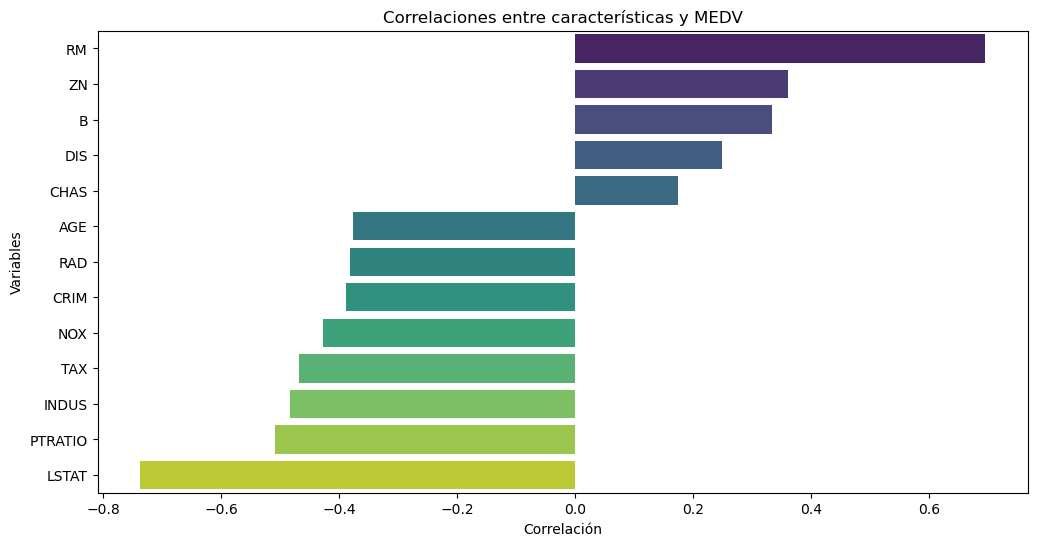

In [63]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Correlacion', y='Variable', data=corr_dfO, orient='h', palette='viridis')

plt.title('Correlaciones entre características y MEDV')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.show()


- Observamos que destacan solo 2 variables con correlación positiva y negativa cercana al target MEDV. Lstat (estatus social más bajo), muestra una correlación negativa, puesto que cuanto menor es el estatus social, mayor es MEDV (valor medio). En el caso de la variable RM (número de habitaciones de las casas), cuantas más habitaciones tiene una casa, más aumenta el valor medio de la vivienda.

- Aqui podemos observar la relación de LSTAT, con la variables:  
    CRIM: vemos que hay más delincuencia en las zonas con mayor pobreza, 
    
    ZN: exagerada la relación de delinquencia en zonas poco residenciales (supongamos centro),
    
    RM y MEDV correlación negativa, como hemos comentado antes,
    
    Bastentes valores atípicos, pero en tema de crimenes, supongo que ya puede ser así,
    
    RAD: la verdad es que se nota más pobreza que en otras zonas. Así que no le voy a dar más importancia en este aspecto.

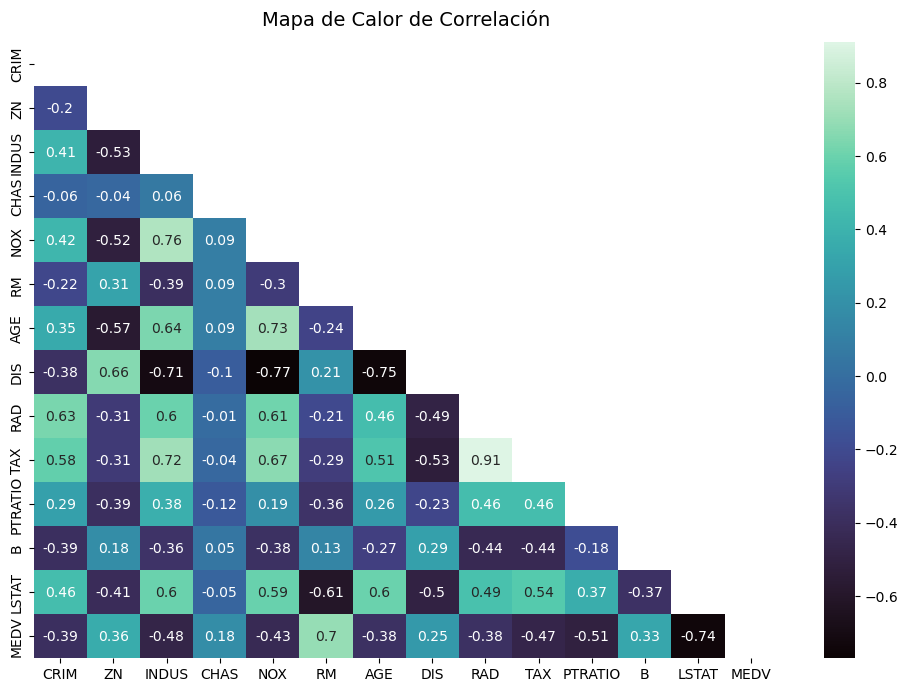

In [14]:
mask = np.triu(np.ones_like(dfO.corr().round(2))) 
plt.figure(figsize=(12, 8))
ax= sns.heatmap(dfO.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Mapa de Calor de Correlación', fontdict={'fontsize':14}, pad=12);

Aqui podemos observar varias variables con correlaciones bastante diferentes, pero si nos centramos en el target MEDV, vemos la correlación muy alta tanto negativa con LSTAT y positiva con RM. Y esto da a entender que la media sube cuando sube el número de habitaciones (que tendrá que ver también con los m2 de los inmuebles) y disminuye cuando aumenta el porcentaje de población con nivel socioeconómico bajo.

- Lo que si destaca en LSTAT, es que en el estudio, hay casas con población bastante inferior.

- Y en resumen, todas las variables influyen en MEDV, precio medio de la vivienda y la misma cuenta con precios muy diferentes. Aunque la relación más evidente es por número de habitaciones y nivel de vida.

### - Exercici 1: ###
**Parteix el conjunt de dades adjunt en train i test**
- Dividimos los datos en un 80% para entrenamiento (train) y un 20% para prueba (test).
- Importaré **train_test_slit de sklearn.**

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
data = dfO.drop(['MEDV'], axis=1)
target= dfO['MEDV']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
# El argumento 'random_state' se utiliza para asegurar que la división sea reproducible.

print("La cantidad de datos para el entrenamiento es de:",len(X_train))
print("La cantidad de datos para el test es de:",len(y_test))

La cantidad de datos para el entrenamiento es de: 404
La cantidad de datos para el test es de: 102



**Estudia els dos conjunts per separat, a nivell descriptiu.**

In [17]:
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.00,3.61,8.88,0.01,0.08,0.26,3.20,88.98
ZN,404.00,11.57,23.15,0.00,0.00,0.00,20.00,100.00
INDUS,404.00,10.99,6.89,0.74,5.13,8.56,18.10,27.74
CHAS,404.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00
NOX,404.00,0.56,0.12,0.38,0.45,0.54,0.63,0.87
RM,404.00,6.32,0.71,3.86,5.89,6.21,6.64,8.78
AGE,404.00,68.56,27.99,2.90,45.55,77.70,93.65,100.00
DIS,404.00,3.81,2.13,1.13,2.09,3.18,5.40,12.13
RAD,404.00,9.36,8.59,1.00,4.00,5.00,12.00,24.00
TAX,404.00,404.03,166.17,187.00,279.00,330.00,666.00,711.00


In [18]:
X_test.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,102.00,3.63,7.46,0.01,0.09,0.21,4.52,45.75
ZN,102.00,10.55,24.08,0.00,0.00,0.00,0.00,95.00
INDUS,102.00,11.74,6.72,0.46,6.10,10.59,18.10,27.74
CHAS,102.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00
NOX,102.00,0.55,0.11,0.39,0.45,0.53,0.62,0.87
RM,102.00,6.16,0.66,3.56,5.87,6.17,6.48,8.03
AGE,102.00,68.65,28.89,6.20,43.80,74.70,95.22,100.00
DIS,102.00,3.74,2.01,1.17,2.26,3.35,4.76,10.71
RAD,102.00,10.31,9.16,1.00,4.00,5.00,24.00,24.00
TAX,102.00,424.89,177.46,188.00,281.75,345.00,666.00,711.00


- En general y comprobando valores aleatorios de diferentes variables y diferentes quantiles, aprecio bastante similitud.

Voy a hacer una visulalización gráfica:

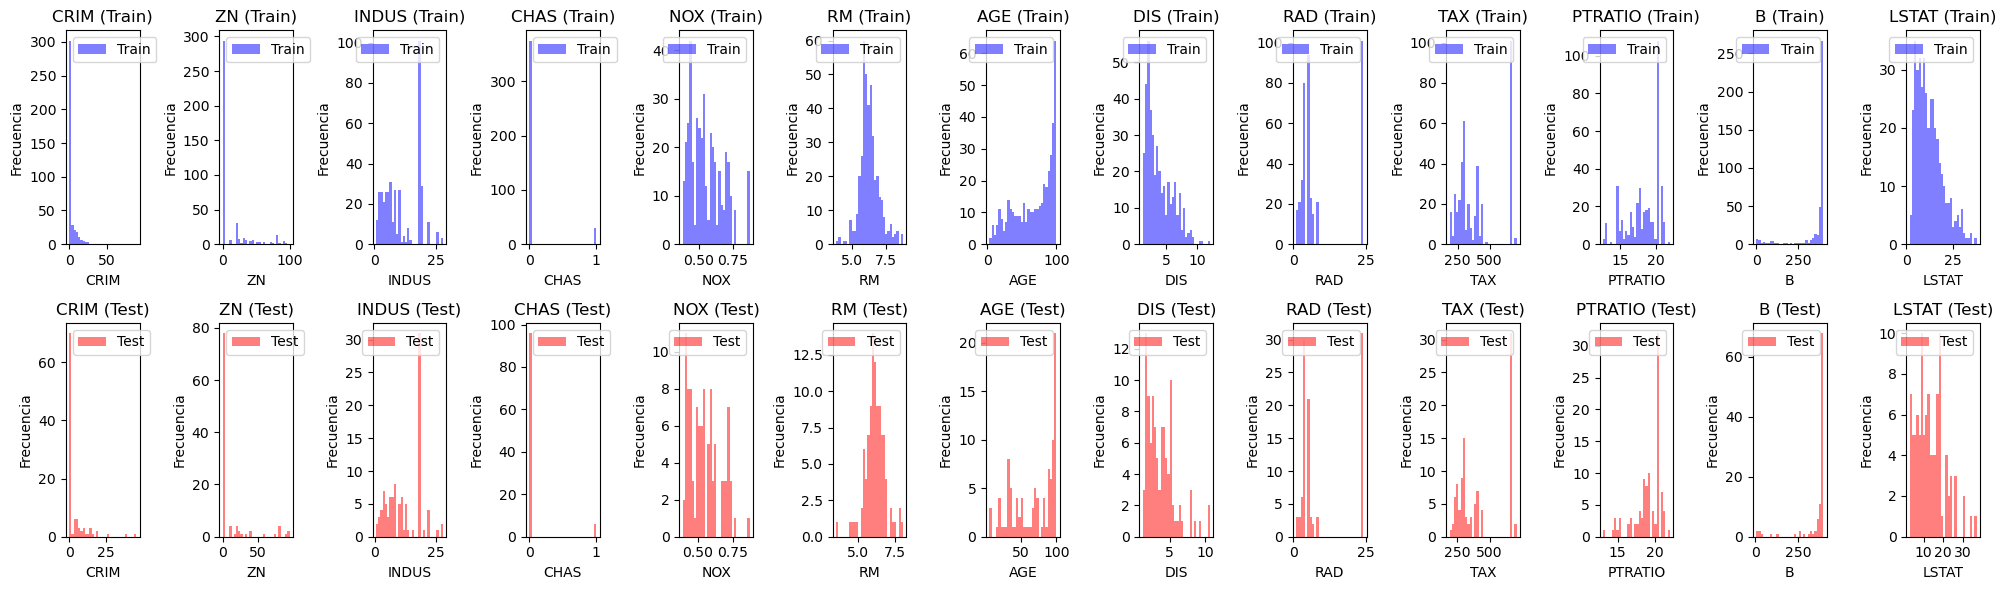

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=X_train.shape[1], figsize=(20, 6))
for i, col in enumerate(X_train.columns):
    
    # histograma de X_train en el primer subplot:
    axes[0, i].hist(X_train[col], bins=30, alpha=0.5, color='blue', label='Train')
  
    # histograma de X_test en el segundo subplot:
    axes[1, i].hist(X_test[col], bins=30, alpha=0.5, color='red', label='Test')
 
    # etiquetas y leyendas
    axes[0, i].set_title(col + ' (Train)')
    axes[1, i].set_title(col + ' (Test)')
    axes[0, i].set_xlabel(col)
    axes[1, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frecuencia')
    axes[1, i].set_ylabel('Frecuencia')
    axes[0, i].legend()
    axes[1, i].legend()
plt.tight_layout()
plt.show()

- En general, veo las test y las train muy parecidas. Esto significa que la prueba me ayudaría a validar modelos de machine learning, y garantizaría que funciona bien en situaciones del mundo real y generalizan correctamente los datos no vistos.

In [20]:
correlation_test = X_test['LSTAT'].corr(y_test)
correlation_train = X_train['LSTAT'].corr(y_train)
print(f"Correlación en el conjunto LSTAT vs MEDV TEST: {correlation_test:.2f}")
print(f"Correlación en el conjunto LSTAT vs MEDV TRAIN: {correlation_train:.2f}")

Correlación en el conjunto LSTAT vs MEDV TEST: -0.74
Correlación en el conjunto LSTAT vs MEDV TRAIN: -0.74


In [21]:
correlation_test2 = X_test['RM'].corr(y_test)
correlation_train2 = X_train['RM'].corr(y_train)
print(f"Correlación en el conjunto RM vs MEDV TEST: {correlation_test2:.2f}")
print(f"Correlación en el conjunto RM vs MEDV TRAIN {correlation_train2:.2f}")

Correlación en el conjunto RM vs MEDV TEST: 0.62
Correlación en el conjunto RM vs MEDV TRAIN 0.71


In [22]:
correlation_test3 = X_test['AGE'].corr(y_test)
correlation_train3 = X_train['AGE'].corr(y_train)
print(f"Correlación en el conjunto  AGE vs MEDV TEST: {correlation_test3:.2f}")
print(f"Correlación en el conjunto AGE vs MEDV TRAIN: {correlation_train3:.2f}")

Correlación en el conjunto  AGE vs MEDV TEST: -0.54
Correlación en el conjunto AGE vs MEDV TRAIN: -0.34


Una vez vistas las estadísticas, he hecho una segunda comprobación aleatoria con valores numéricos, y creo que Test y Train són bastante parecidos y fiables para hacer las pruebas.

- Voy a hacer un boxplot para apreciar valores atípicos: 

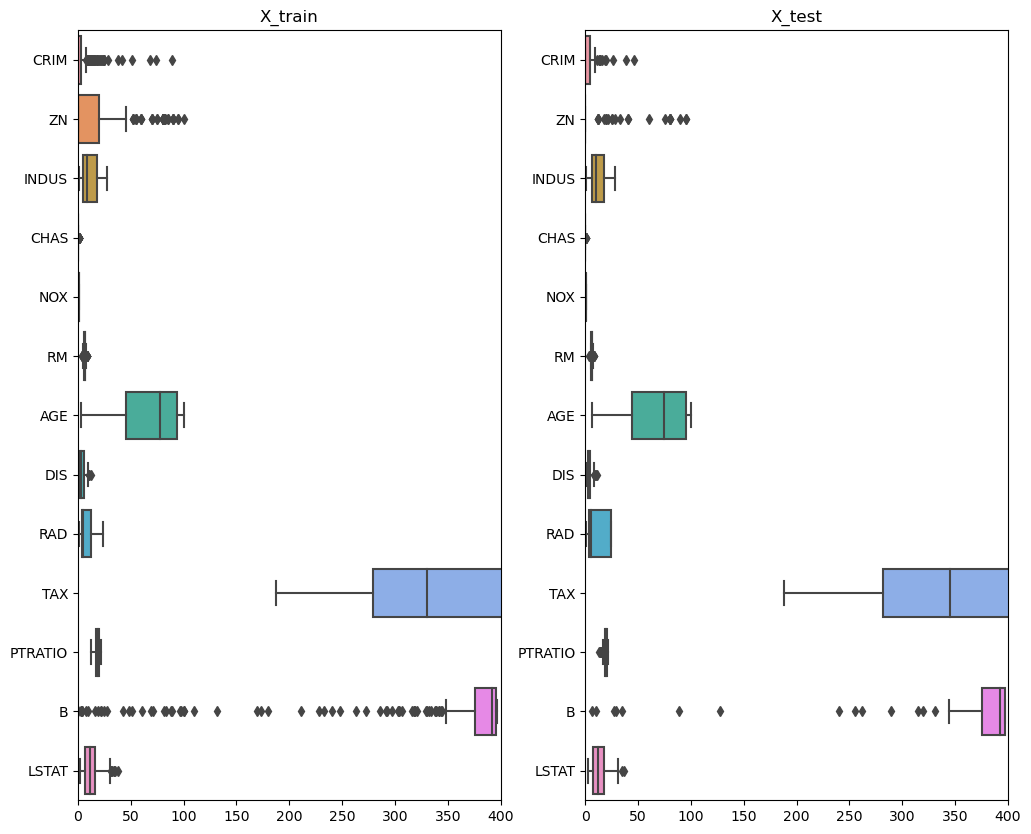

In [67]:
fig = plt.figure(figsize=(12, 10))

# Límites en el eje X para ver mejor, solo tasa sale del 400
x_limit = (0, 400)

ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(X_train, ax=ax1, orient="h")
ax1.set_xlim(x_limit)
plt.title('X_train')

ax2 = fig.add_subplot(1, 2, 2)
sns.boxplot(X_test, ax=ax2, orient="h")
ax2.set_xlim(x_limit)
plt.title('X_test')

plt.show()

- ZN, B, son los que veo más diferentes entre la gráfica Test y Train. 

- Destacan algunos valores atípicos: CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT y MEDV parecen tener altos valores atípicos.

In [24]:
correlation_train4 = X_train['ZN'].corr(y_train)
correlation_test4 = X_test['ZN'].corr(y_test)
print(f"Correlación en el conjunto ZN Vs MEDV train: {correlation_train4:.2f}")
print(f"Correlación en el conjunto ZN Vs MEDV test: {correlation_test4:.2f}")

Correlación en el conjunto ZN Vs MEDV train: 0.31
Correlación en el conjunto ZN Vs MEDV test: 0.57


In [25]:
correlation_train5 = X_train['B'].corr(y_train)
correlation_test5 = X_test['B'].corr(y_test)
print(f"Correlación en el conjunto B Vs MEDV train: {correlation_train5:.2f}")
print(f"Correlación en el conjunto B Vs MEDV test: {correlation_test5:.2f}")

Correlación en el conjunto B Vs MEDV train: 0.34
Correlación en el conjunto B Vs MEDV test: 0.31


In [26]:
mean_xtest = X_test[['ZN', 'B']].mean()
mean_xtrain = X_train[['ZN', 'B']].mean()

ZN_B= pd.concat([mean_xtrain, mean_xtest], axis=1, keys=['X_train', 'X_test'])
ZN_B['Diferencia'] = ZN_B['X_train']-ZN_B['X_test']
ZN_B.round(2)

,X_train,X_test,Diferencia
ZN,11.57,10.55,1.02
B,356.28,358.24,-1.96


- En cuanto a la diferencia entre Test y Train, no veo que sea significativa, aunque sí que me más adelante me gustaría tomar en cuenta los outliers que aparecen.

**Prueba de normalidad:**
- Voy a comprobar tanto por train como por test, si las variables tienen distribución normal o no.
- utilizaré **Shapiro-Wilk de scipy.stats.**

La hipotesis nula (h0) es: La variable, sigue una distribución normal.

La hipótesis 1 (h1) es: La variable, no sigue una distribución normal.

In [70]:
for i in X_train:
    
    stat, p = shapiro(X_train[i])
    
    print('stat=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
         print(f'La variable {i} sigue una distribución normal. Se acepta H0.\n')
    else: 
         print(f'La variable {i} NO sigue una distribución normal. Se rechaza H0.\n')

stat=0.431, p=0.000
La variable CRIM NO sigue una distribución normal. Se rechaza H0.

stat=0.569, p=0.000
La variable ZN NO sigue una distribución normal. Se rechaza H0.

stat=0.892, p=0.000
La variable INDUS NO sigue una distribución normal. Se rechaza H0.

stat=0.281, p=0.000
La variable CHAS NO sigue una distribución normal. Se rechaza H0.

stat=0.934, p=0.000
La variable NOX NO sigue una distribución normal. Se rechaza H0.

stat=0.959, p=0.000
La variable RM NO sigue una distribución normal. Se rechaza H0.

stat=0.894, p=0.000
La variable AGE NO sigue una distribución normal. Se rechaza H0.

stat=0.901, p=0.000
La variable DIS NO sigue una distribución normal. Se rechaza H0.

stat=0.680, p=0.000
La variable RAD NO sigue una distribución normal. Se rechaza H0.

stat=0.818, p=0.000
La variable TAX NO sigue una distribución normal. Se rechaza H0.

stat=0.910, p=0.000
La variable PTRATIO NO sigue una distribución normal. Se rechaza H0.

stat=0.479, p=0.000
La variable B NO sigue una d

In [71]:
for i in X_test:
    
    stat, p = shapiro(X_test[i])
    print('stat=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
         print(f'La variable {i} sigue una distribución normal. Se acepta H0.\n')
    else: 
         print(f'La variable {i} NO sigue una distribución normal. Se rechaza H0.\n')

stat=0.543, p=0.000
La variable CRIM NO sigue una distribución normal. Se rechaza H0.

stat=0.501, p=0.000
La variable ZN NO sigue una distribución normal. Se rechaza H0.

stat=0.923, p=0.000
La variable INDUS NO sigue una distribución normal. Se rechaza H0.

stat=0.249, p=0.000
La variable CHAS NO sigue una distribución normal. Se rechaza H0.

stat=0.938, p=0.000
La variable NOX NO sigue una distribución normal. Se rechaza H0.

stat=0.958, p=0.003
La variable RM NO sigue una distribución normal. Se rechaza H0.

stat=0.878, p=0.000
La variable AGE NO sigue una distribución normal. Se rechaza H0.

stat=0.889, p=0.000
La variable DIS NO sigue una distribución normal. Se rechaza H0.

stat=0.674, p=0.000
La variable RAD NO sigue una distribución normal. Se rechaza H0.

stat=0.800, p=0.000
La variable TAX NO sigue una distribución normal. Se rechaza H0.

stat=0.879, p=0.000
La variable PTRATIO NO sigue una distribución normal. Se rechaza H0.

stat=0.466, p=0.000
La variable B NO sigue una d

- Ambos resultados nos muestran que ninguna variable tiene una distribución normal y muestran unos valores P muy bajos.

- No hace falta hacer gráficas porque saldrían parecidas a las del df antes de hacer el test train.

### - Exercici 2 ###
Aplica algun procés de transformació:
- Estandarditzar les dades numèriques
- Crear columnes dummies
- Polinomis...

**Estandarización de Datos Numéricos:**
La estandarización implica ajustar las características numéricas para que tengan una media de cero y una desviación estándar de uno. 

Esto ayuda a que las características estén en la misma escala y facilita la convergencia de muchos algoritmos de aprendizaje automático.

Se realiza restando la media de la característica y dividiendo por la desviación estándar.

Usaré: **StandardScaler** de Scikit-Learn o **RobustScaler** y **MinMaxScaler**.

Descarto **StandardScaler** : solo puede funcionar bien cuando tus datos siguen una distribución normal y no tienes valores atípicos significativos.

**RobustScaler**: es resistente a los valores atípicos y escalas las características basándose en estadísticas robustas como la mediana y el rango intercuartil (IQR).

Este escalador es útil cuando tus datos contienen valores atípicos significativos y no puedes asumir una distribución normal.


**MinMaxScaler**: transforma las características para que estén en el rango [0, 1]. Es útil cuando deseas que todas tus características tengan la misma escala y estén en el mismo rango, pero no es resistente a los valores atípicos.

Vamos a separar las variables de (X_train y X_test) en dos conjuntos:
- Variables con valores atípicos,para aplicar RobustScaler (CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT)
- Variables sin valores atípicos, para aplicar MinMaxScaler (INDUS, NOX, AGE, TAX).

In [29]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [30]:
col_outliers = ['CRIM','ZN', 'RM', 'DIS', 'PTRATIO','B', 'LSTAT']

scaling = RobustScaler()
X_train_Robust = scaling.fit_transform(X_train[col_outliers])
X_test_Robust = scaling.transform(X_test[col_outliers])

train_Robust = pd.DataFrame(X_train_Robust, columns=col_outliers)
test_Robust = pd.DataFrame(X_test_Robust, columns=col_outliers)

In [31]:
train_Robust.head()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,4.73,0.00,-1.21,-0.32,0.44,-2.06,1.46
1,0.12,0.00,-0.50,0.40,0.68,0.21,-0.26
2,-0.07,1.75,-0.24,1.05,-0.53,-1.43,-0.32
3,2.17,0.00,-0.14,-0.35,0.44,-19.17,1.29
4,0.15,0.00,-0.65,0.19,0.68,-0.02,0.04


In [32]:
test_Robust.head()

,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,-0.05,0.00,0.28,-0.16,-0.62,0.21,-0.20
1,-0.07,2.00,0.73,0.27,-0.32,0.28,-0.77
2,-0.05,0.00,-0.30,-0.39,0.41,-0.06,0.74
3,-0.05,0.00,-0.19,0.64,0.15,-0.02,-0.56
4,1.55,0.00,0.12,-0.24,0.44,-0.31,0.66


In [33]:
# Columnas a escalar:
col_no_outliers = ['INDUS', 'NOX', 'AGE', 'TAX']

# Inicializo el escalador:
scaling = MinMaxScaler()

# Escala los datos en función de las columnas especificadas
X_train_MinMax = scaling.fit_transform(X_train[col_no_outliers])
X_test_MinMax = scaling.transform(X_test[col_no_outliers])

# Crea DataFrames para los datos escalados
train_MinMax = pd.DataFrame(X_train_MinMax, columns=col_no_outliers)
test_MinMax = pd.DataFrame(X_test_MinMax, columns=col_no_outliers)

In [34]:
train_MinMax.head()

,INDUS,NOX,AGE,TAX
0,0.64,0.47,0.97,0.91
1,0.27,0.31,0.55,0.23
2,0.20,0.11,0.21,0.22
3,0.64,0.47,0.85,0.91
4,0.27,0.31,0.69,0.23


In [35]:
test_MinMax.head()

,INDUS,NOX,AGE,TAX
0,0.12,0.26,0.84,0.21
1,0.21,0.13,0.31,0.13
2,1.00,0.46,0.99,1.00
3,0.37,0.06,0.05,0.23
4,0.64,0.67,0.92,0.91


Una vez que se tienen los cambios, concatenamos los dataframes para tener los cambios hechos en X_train y X_test.

In [36]:
x_test_escal = pd.concat([test_MinMax.reset_index(drop=True).reset_index(drop=True),
                    test_Robust.reset_index(drop=True)], axis=1)
x_train_escal = pd.concat([train_MinMax.reset_index(drop=True).reset_index(drop=True),
                     train_Robust.reset_index(drop=True)], axis=1)

pd.set_option('display.max_columns', None)

In [37]:
x_test_escal.head(2)

,INDUS,NOX,AGE,TAX,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,0.12,0.26,0.84,0.21,-0.05,0.00,0.28,-0.16,-0.62,0.21,-0.20
1,0.21,0.13,0.31,0.13,-0.07,2.00,0.73,0.27,-0.32,0.28,-0.77


In [38]:
x_train_escal.head(2)

,INDUS,NOX,AGE,TAX,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT
0,0.64,0.47,0.97,0.91,4.73,0.00,-1.21,-0.32,0.44,-2.06,1.46
1,0.27,0.31,0.55,0.23,0.12,0.00,-0.50,0.40,0.68,0.21,-0.26


In [73]:
X_train_CHAS = X_train['CHAS']
X_test_CHAS = X_test['CHAS']

**Creación de Variables Dummy:** Cuando tienes características categóricas, como género o país, es común convertirlas en variables dummy (o one-hot encoding). Cada categoría se convierte en una columna binaria separada.

Esto permite que los algoritmos de aprendizaje automático trabajen con estas características categóricas. 

Usaré: **get_dummies** de pandas (incluido en paquete pandas) o **OneHotEncoder de sklearn.**

In [74]:
from sklearn.preprocessing import OneHotEncoder

De las dos variables categóricas, CHAS, ya es binaria. Así que utilizaré la variable categórica RAD para crear columnas dummies.

In [75]:
from sklearn.compose import ColumnTransformer
ohe = OneHotEncoder()
ohe_rad = ohe.fit_transform(dfO[['RAD']]).toarray()

ohe.categories
ohe_rad_labels = ['RAD1', 'RAD2', 'RAD3', 'RAD4', 'RAD5', 'RAD6', 'RAD7', 'RAD8', 'RAD24' ]

ohe_train = pd.DataFrame(ohe_rad, columns=ohe_rad_labels)
ohe_train.head(2)

,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [76]:
ohe_test = pd.DataFrame(ohe_rad, columns=ohe_rad_labels)
ohe_test.head(2)

,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [77]:
X_train = pd.concat([
    train_MinMax.reset_index(drop=True),
    X_train_CHAS.reset_index(drop=True),
    train_Robust.reset_index(drop=True),
    ohe_train.reset_index(drop=True)
], axis=1)

X_test = pd.concat([
    test_MinMax.reset_index(drop=True),
    X_test_CHAS.reset_index(drop=True),
    test_Robust.reset_index(drop=True),
    ohe_test.reset_index(drop=True)
], axis=1)

pd.set_option('display.max_columns', None)


In [78]:
X_train.head(5)

,INDUS,NOX,AGE,TAX,CHAS,CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT,RAD1,RAD2,RAD3,RAD4,RAD5,RAD6,RAD7,RAD8,RAD24
0,0.64,0.47,0.97,0.91,0.00,4.73,0.00,-1.21,-0.32,0.44,-2.06,1.46,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.27,0.31,0.55,0.23,0.00,0.12,0.00,-0.50,0.40,0.68,0.21,-0.26,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.20,0.11,0.21,0.22,0.00,-0.07,1.75,-0.24,1.05,-0.53,-1.43,-0.32,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.64,0.47,0.85,0.91,0.00,2.17,0.00,-0.14,-0.35,0.44,-19.17,1.29,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.27,0.31,0.69,0.23,0.00,0.15,0.00,-0.65,0.19,0.68,-0.02,0.04,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


### - Exercici 3 ###
Resumeix les noves columnes generades de manera estadística i gràfica.

- Comparación entre original y transformado: 

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INDUS    404 non-null    float64
 1   NOX      404 non-null    float64
 2   AGE      404 non-null    float64
 3   TAX      404 non-null    float64
 4   CHAS     404 non-null    float64
 5   CRIM     404 non-null    float64
 6   ZN       404 non-null    float64
 7   RM       404 non-null    float64
 8   DIS      404 non-null    float64
 9   PTRATIO  404 non-null    float64
 10  B        404 non-null    float64
 11  LSTAT    404 non-null    float64
 12  RAD1     506 non-null    float64
 13  RAD2     506 non-null    float64
 14  RAD3     506 non-null    float64
 15  RAD4     506 non-null    float64
 16  RAD5     506 non-null    float64
 17  RAD6     506 non-null    float64
 18  RAD7     506 non-null    float64
 19  RAD8     506 non-null    float64
 20  RAD24    506 non-null    float64
dtypes: float64(21)
m

In [80]:
dfO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


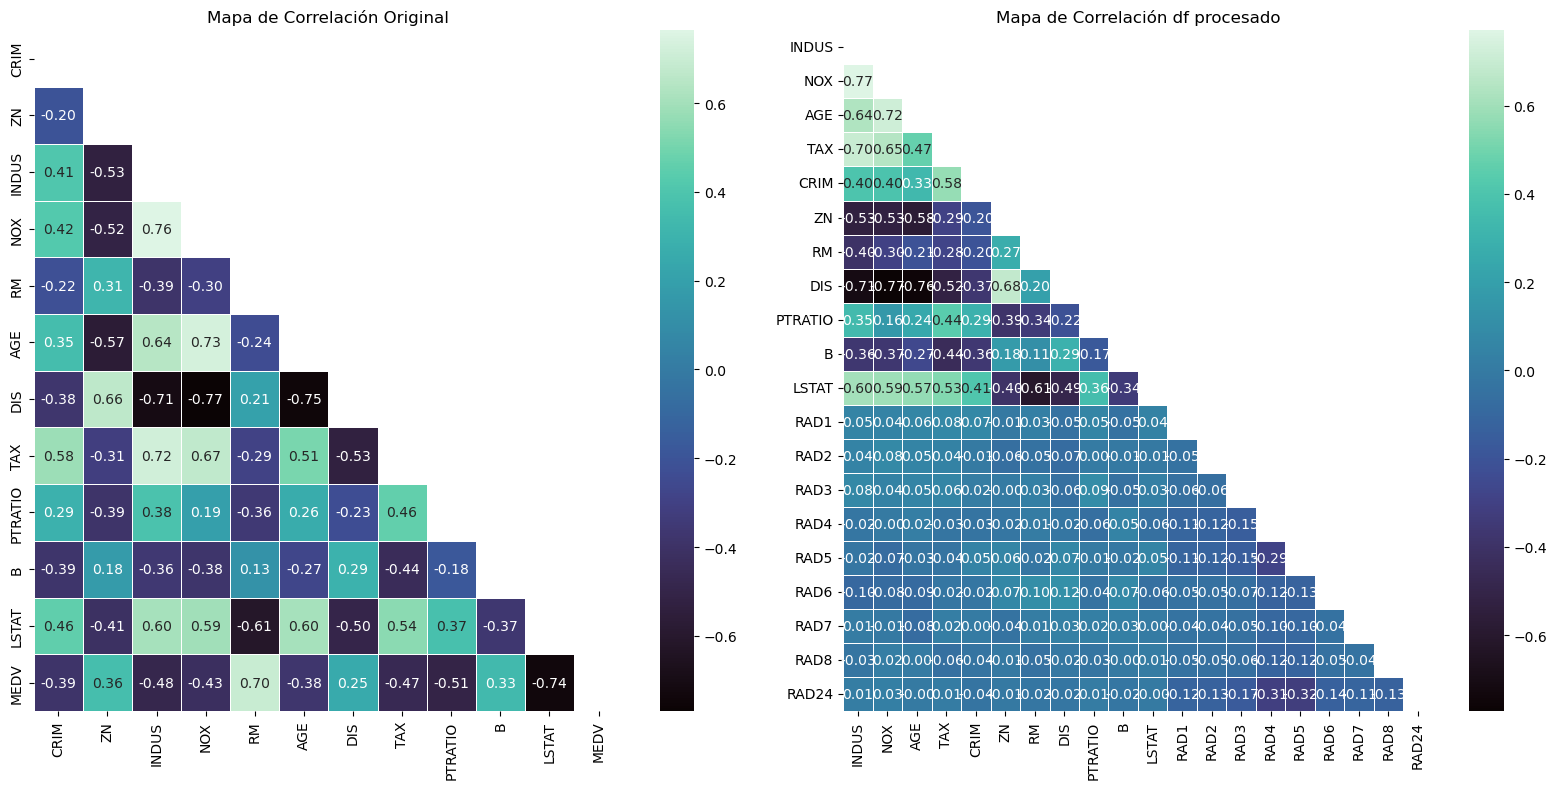

In [81]:
# Mapa de correlación del df X_train
correlation_matrix1 = dfO.drop(['CHAS', 'RAD'], axis=1).corr()
mask1 = np.triu(np.ones_like(correlation_matrix1, dtype=bool))
# Mapa del df X_train definitivo
correlation_matrix2 = X_train.drop(['CHAS'], axis=1).corr()
mask2 = np.triu(np.ones_like(correlation_matrix2, dtype=bool))

# Creo la figura con dos subgráficos uno al lado del otro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Graficar el primer mapa de correlación en el primer subgráfico
sns.heatmap(correlation_matrix1, annot=True, cmap="mako", fmt=".2f", linewidths=0.5, mask=mask1, ax=ax1)
ax1.set_title("Mapa de Correlación Original")
# Graficar el segundo mapa de correlación en el segundo subgráfico
sns.heatmap(correlation_matrix2, annot=True, cmap="mako", fmt=".2f", linewidths=0.5, mask=mask2, ax=ax2)
ax2.set_title("Mapa de Correlación df procesado")

# Ajuste del espaciado entre los subgráficos si hace falta
plt.tight_layout()
plt.show()

Podemos observar mapa de correlación muy parecido pero con decimales algo distintos. Y los valores a destacar con más correlación, tanto positiva como negativa, siguen siendo los mismos.

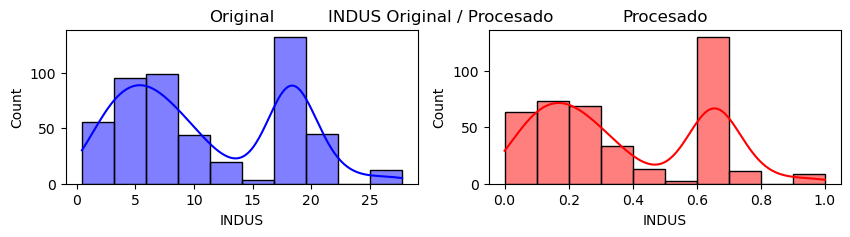

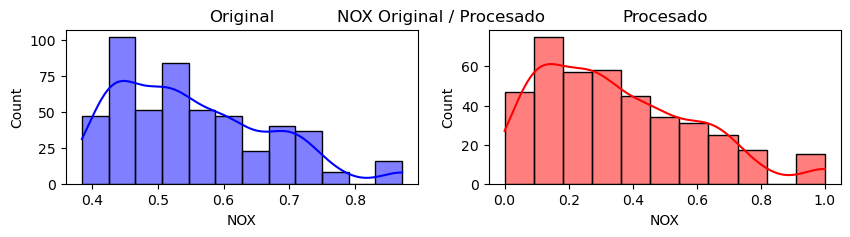

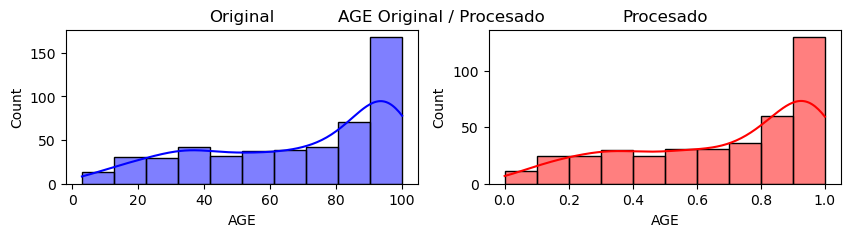

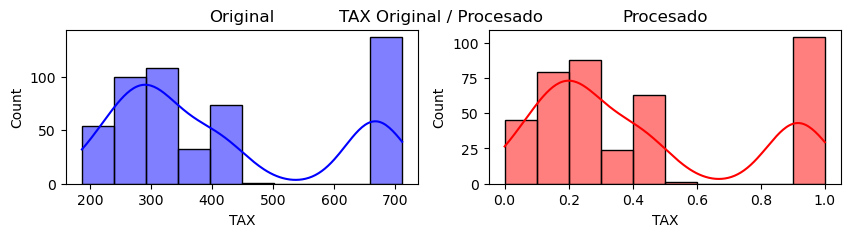

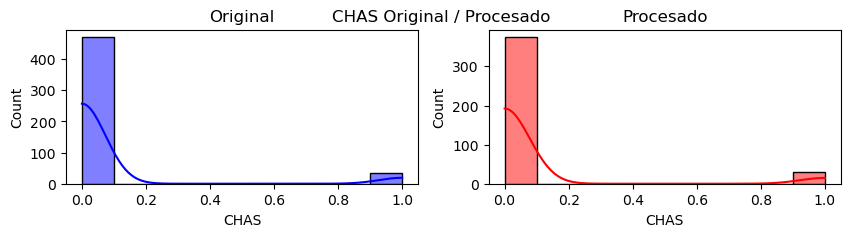

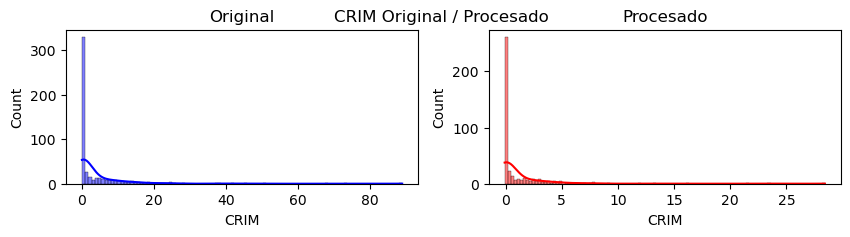

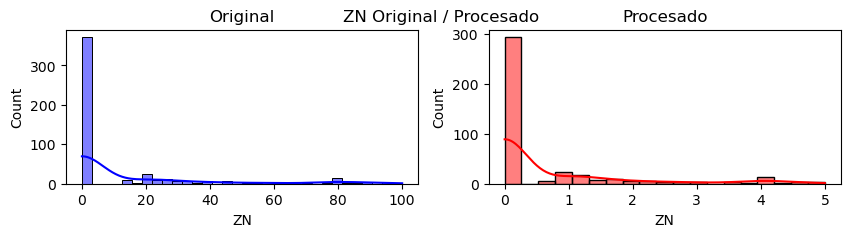

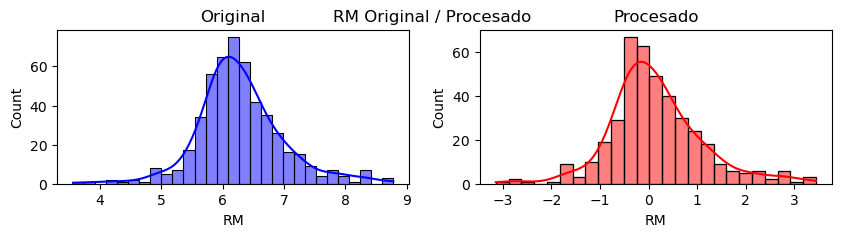

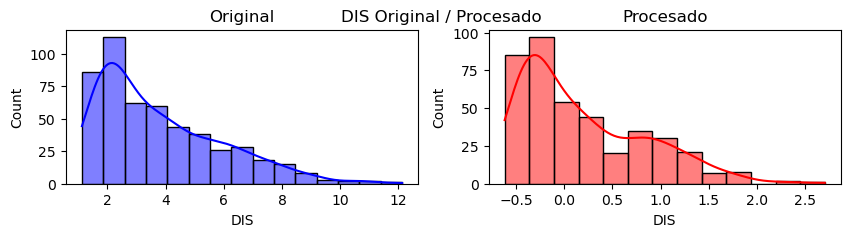

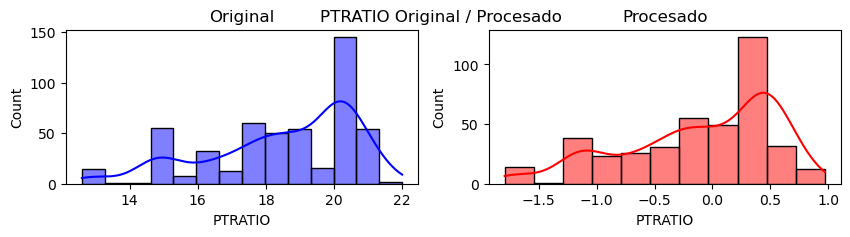

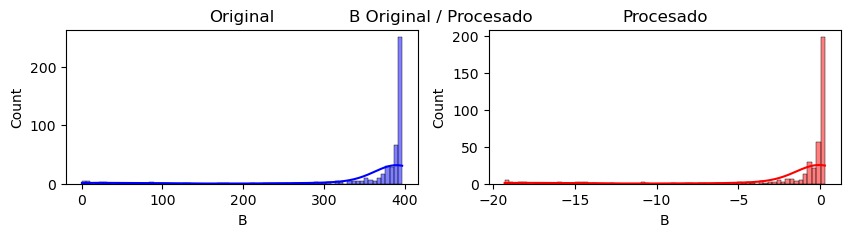

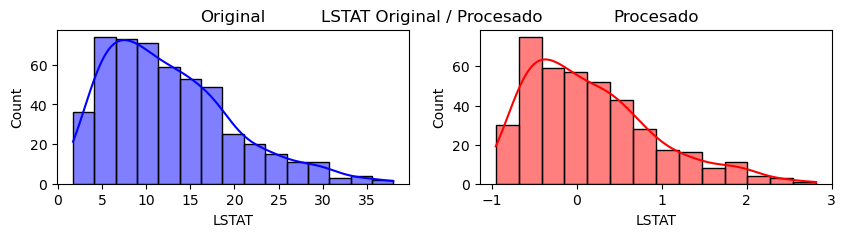

In [82]:
columns = X_train.columns

for column in columns:
    if column in dfO.columns:
        fig, axes = plt.subplots(1, 2, figsize=(10, 2))
        fig.suptitle(f'{column} Original / Procesado', fontsize=12)

        # Gráfico para la variable original
        sns.histplot(ax=axes[0], data=dfO, x=dfO[column], kde=True, color='blue')
        axes[0].set_title('Original')

        # Gráfico para la variable procesada
        sns.histplot(ax=axes[1], data=X_train, x=X_train[column], kde=True, color='red')
        axes[1].set_title('Procesado')

        plt.show()

Podemos observar que las variables siguen las mismas curvas, a pesar de moverse entre valores distintos. Hemos comprimido los valores para movernos en los mismos rangos pero la distribución de las variables es igual. 

Supongo que esto da confianza a la hora de usar los procesos de transforamción con confianza.